# 0. Instalação dos pacotes utilizados

In [1]:
!pip install keras matplotlib

# 1. Importação dos módulos

In [2]:
import numpy as np

In [3]:
import keras
from keras import layers

In [4]:
import matplotlib.pyplot as plt

# 2. Leitura dos dados

In [5]:
(x_train_ori, y_train_ori), (x_test_ori, y_test_ori) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [6]:
x_train_ori.shape

(50000, 32, 32, 3)

In [7]:
x_test_ori.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
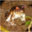

In [8]:
x_train_ori[0]

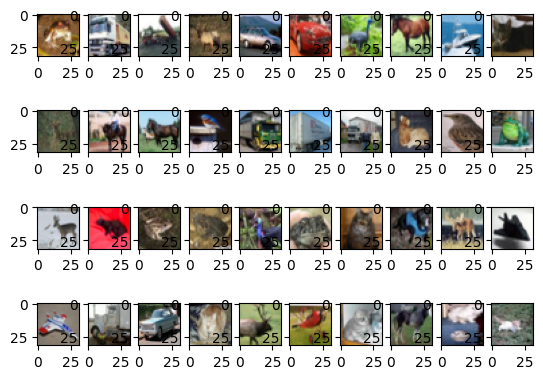

In [9]:
fig, axs = plt.subplots(4, 10)

for i in range(4):
  for j in range(10):
    axs[i, j].imshow(x_train_ori[i * 10 + j], cmap='gray')

# 3. Preparação dos dados

Neste exemplo ocorre o processo de normalização dos dados da imagem.

In [10]:
num_classes = 10
dimensao_entrada = (32, 32, 3)

## 3.1 Normalização dos dados e redimensionamento dos vetores

No processo de normalização, os dados da imagem entra na escala valores $[0, 1]$.

In [11]:
x_train = x_train_ori.astype("float32") / 255
x_test = x_test_ori.astype("float32") / 255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
print(x_train.shape[0], " amostras de treino")
print(x_test.shape[0], " amostras de teste")

50000  amostras de treino
10000  amostras de teste


## 3.3. Realiza a modificação de representação dos alvos para a representação *one-hot-enconding*

In [14]:
#Realiza a representação do one-hot-enconding
y_train = keras.utils.to_categorical(y_train_ori, num_classes)
y_test = keras.utils.to_categorical(y_test_ori, num_classes)

In [15]:
y_train_ori[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# 4. Definição do modelo de Rede Neural Artificial (RNA)

In [17]:
modelo = keras.Sequential(
    [
        keras.Input(shape=dimensao_entrada),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [18]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0

# 5. Treinamento da RNA

In [19]:
batch_size = 128
epochs = 15

In [20]:
modelo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
historico = modelo.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 51s 142ms/step - loss: 1.7234 - accuracy: 0.3772 - val_loss: 1.4280 - val_accuracy: 0.4870
Epoch 2/15
352/352 [==============================] - 47s 134ms/step - loss: 1.3882 - accuracy: 0.5063 - val_loss: 1.2565 - val_accuracy: 0.5610
Epoch 3/15
352/352 [==============================] - 45s 129ms/step - loss: 1.2786 - accuracy: 0.5506 - val_loss: 1.1678 - val_accuracy: 0.6004
Epoch 4/15
352/352 [==============================] - 46s 131ms/step - loss: 1.1963 - accuracy: 0.5823 - val_loss: 1.1148 - val_accuracy: 0.6142
Epoch 5/15
352/352 [==============================] - 45s 127ms/step - loss: 1.1452 - accuracy: 0.5980 - val_loss: 1.0506 - val_accuracy: 0.6394
Epoch 6/15
352/352 [==============================] - 47s 133ms/step - loss: 1.1140 - accuracy: 0.6123 - val_loss: 1.0233 - val_accuracy: 0.6520
Epoch 7/15
352/352 [==============================] - 47s 133ms/step - loss: 1.0789 - accuracy: 0.6254 - val_loss: 0.9897 - val_ac

# 6. Avaliação do modelo de RNA

In [22]:
score = modelo.evaluate(x_test, y_test, verbose=0)

In [23]:
print("Conjunto de testes")
print("loss:", score[0])
print("accuracy:", score[1])

Conjunto de testes
loss: 0.8980399370193481
accuracy: 0.6951000094413757


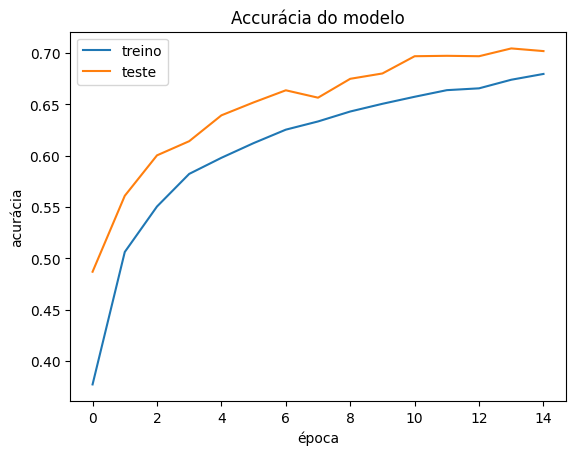

In [24]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Accurácia do modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

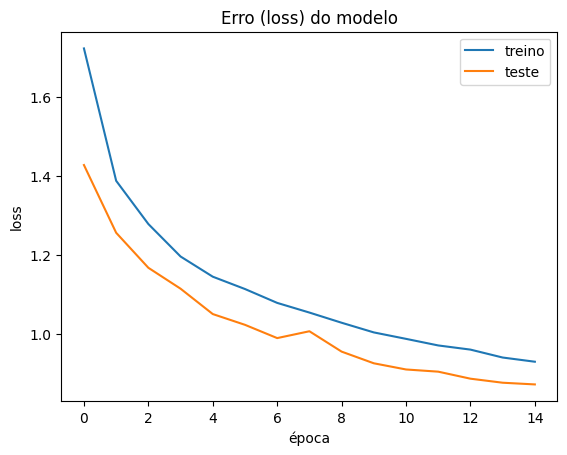

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Erro (loss) do modelo')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper right')
plt.show()

# 7. Observando as predições

In [37]:
ind = 5

array([[[179, 118,  83],
        [139,  96,  61],
        [ 77,  49,  26],
        ...,
        [ 87,  53,  46],
        [ 76,  47,  41],
        [ 77,  47,  41]],

       [[184, 130,  97],
        [133,  88,  53],
        [128,  89,  58],
        ...,
        [ 98,  61,  53],
        [ 91,  58,  51],
        [ 90,  57,  49]],

       [[180, 132, 100],
        [152, 104,  71],
        [176, 129,  92],
        ...,
        [101,  62,  53],
        [ 93,  56,  47],
        [ 95,  57,  49]],

       ...,

       [[142,  73,  61],
        [149,  84,  75],
        [144,  81,  73],
        ...,
        [119,  68,  56],
        [139,  87,  78],
        [159, 100,  89]],

       [[152,  83,  70],
        [166,  96,  81],
        [179, 106,  90],
        ...,
        [131,  77,  65],
        [144,  87,  77],
        [153,  90,  79]],

       [[159,  92,  79],
        [178, 107,  93],
        [183, 113,  95],
        ...,
        [150,  90,  76],
        [153,  91,  79],
        [152,  87,  73]]], dtype=uint8)
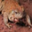

In [38]:
x_test_ori[ind]

In [39]:
x_test[ind].shape

(32, 32, 3)

In [40]:
res = modelo.predict(np.expand_dims(x_test[ind], 0))

1/1 [==============================] - 0s 43ms/step


In [41]:
res.shape

(1, 10)

In [42]:
res

array([[0.00341863, 0.00198012, 0.0114221 , 0.04787651, 0.04666148,
        0.02424033, 0.8345224 , 0.01347566, 0.00457638, 0.01182622]],
      dtype=float32)

In [43]:
print(res[0])

[0.00341863 0.00198012 0.0114221  0.04787651 0.04666148 0.02424033
 0.8345224  0.01347566 0.00457638 0.01182622]


In [44]:
n_classe = np.argmax(res[0])

In [45]:
mapa_classes = {
  0 : "airplane",
  1 : "automobile",
  2	: "bird",
  3	: "cat",
  4	: "deer",
  5	: "dog",
  6	: "frog",
  7 :	"horse",
  8 :	"ship",
  9	: "truck"
}

In [46]:
mapa_classes[n_classe]

'frog'